In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)

In [3]:
X = x.reshape(-1,1)

In [4]:
y = 0.5 * x**2 + x+ 2 +np.random.normal(0,1,size=100)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures(degree=2)

In [7]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
X2 = poly.transform(X)

In [9]:
X2.shape

(100, 3)

In [10]:
X2[:5,:]

array([[ 1.        ,  1.75283813,  3.07244151],
       [ 1.        , -1.64391252,  2.70244838],
       [ 1.        ,  2.92700776,  8.56737445],
       [ 1.        ,  1.83138162,  3.35395862],
       [ 1.        , -1.22337496,  1.49664628]])

In [11]:
X[:5,:]

array([[ 1.75283813],
       [-1.64391252],
       [ 2.92700776],
       [ 1.83138162],
       [-1.22337496]])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg2 = LinearRegression()

In [14]:
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_predict2 = lin_reg2.predict(X2)

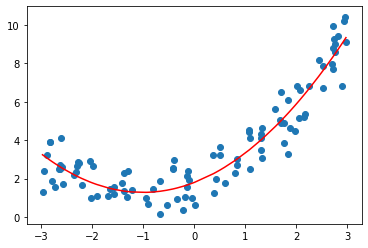

In [16]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')

In [17]:
lin_reg2.coef_

array([0.       , 1.0259481, 0.5101615])

### 关于polynormailFeatures

In [18]:
X = np.arange(1,11).reshape(-1,2)

In [19]:
X.shape

(5, 2)

In [20]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [21]:
poly = PolynomialFeatures(degree=2)

In [22]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [23]:
X2 = poly.transform(X)

In [24]:
X2.shape

(5, 6)

In [25]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### pipeline

In [26]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x+ 2 +np.random.normal(0,1,size=100)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [30]:
poly_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
y_predict = poly_reg.predict(X)

In [32]:
y_predict

array([1.66518014, 1.96606441, 1.72720391, 8.14123506, 7.4211115 ,
       7.9795252 , 3.02491014, 2.3111497 , 4.80663197, 1.78189295,
       2.66917958, 1.78357567, 5.32955275, 1.63888459, 1.98990907,
       8.43017603, 2.86284213, 5.46015611, 5.35819151, 2.35598669,
       5.42026979, 8.56954886, 1.64038206, 2.19154428, 1.81529043,
       2.09969711, 6.87858117, 1.83723196, 8.35804581, 2.81105584,
       8.56839854, 4.15660347, 3.07169119, 2.47543367, 5.63204213,
       1.89059148, 1.63396516, 1.95452397, 5.96023259, 5.32591772,
       6.13670379, 2.46233925, 2.76282439, 2.96688858, 6.14272306,
       2.33060013, 6.87826838, 3.0259246 , 8.16789192, 1.69545598,
       3.18425092, 6.9222908 , 1.91944222, 1.78450749, 3.90817435,
       1.992106  , 1.74650045, 4.6443234 , 5.03526846, 5.96838658,
       5.45782577, 2.90935515, 2.26689809, 6.64033769, 3.86948973,
       1.68821587, 1.8921775 , 1.67204749, 1.95664326, 1.65381943,
       7.94634957, 2.33610921, 7.89067699, 1.72054646, 2.26389

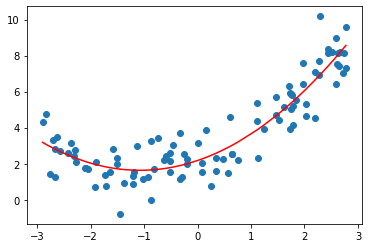

In [33]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')